### TESS light curve filtering


**TESS data**, on the other hand, still contains 
* **both instrumental and astrophysical** signatures (in the case of SAP data) 

* or just **astrophysical ones** (in the case of PDCSAP). 

When several weeks of continuous observations are available, several approaches can be implemented:

1. Selection of each transit and independent modelling of the out-transit part around each transit

2. Modelling of the astrophysical noise through a physically-justified model

3. Empirical removal of the instrumental and astrophysical signals, regardless of their origins, through an automatic filtering algorithm

На основе предоставленных файлов, вот различия между инструментальными и астрофизическими сигналами, которые мы хотим фильтровать:

1. **Инструментальные сигналы**: 
   - Эти сигналы связаны с систематическими погрешностями, возникающими из-за оборудования и процессов обработки данных. Обычно это включает флуктуации, внесённые инструментами, такие как колебания чувствительности детекторов или ошибки в калибровке. 
   - В контексте PDCSAP, инструментальные систематики удаляются с помощью Котрендинговых базисных векторов (CBVs), которые используются для снижения этих систематик в данных, полученных с помощью TESS [lecture02_TESS_lightcurve_file.pdf].

2. **Астрофизические сигналы**: 
   - Эти сигналы связаны с естественными изменениями светимости звезды или планетарных систем, которые наблюдаются. Это могут быть такие явления, как изменение блеска звезды из-за вращения, транзитов планет или других астрономических событий.
   - Астрофизические сигналы в данных PDCSAP могут быть смоделированы через физически обоснованные модели для улучшения анализа данных [lecture03_TESS_lightcurve_filtering.pdf].

Таким образом, фильтрация данных заключается в удалении инструментальных эффектов для более точного изучения астрофизических явлений.

We need to import the TESS data we have to flatten. 

**!!!! Remember to repeat the operation for every TESS sector you want to analyze.**



Let's import the usual packages and then import wotan following the prescriptions in the documentation.

**TESS data**, on the other hand, still contains 
* **both instrumental and astrophysical** signatures (in the case of SAP data) 

* or just **astrophysical ones** (in the case of PDCSAP). 

When several weeks of continuous observations are available, several approaches can be implemented:

1. Selection of each transit and independent modelling of the out-transit part around each transit

2. Modelling of the astrophysical noise through a physically-justified model

3. Empirical removal of the instrumental and astrophysical signals, regardless of their origins, through an automatic filtering algorithm

На основе предоставленных файлов, вот различия между инструментальными и астрофизическими сигналами, которые мы хотим фильтровать:

1. **Инструментальные сигналы**: 
   - Эти сигналы связаны с систематическими погрешностями, возникающими из-за оборудования и процессов обработки данных. Обычно это включает флуктуации, внесённые инструментами, такие как колебания чувствительности детекторов или ошибки в калибровке. 
   - В контексте PDCSAP, инструментальные систематики удаляются с помощью Котрендинговых базисных векторов (CBVs), которые используются для снижения этих систематик в данных, полученных с помощью TESS [lecture02_TESS_lightcurve_file.pdf].

2. **Астрофизические сигналы**: 
   - Эти сигналы связаны с естественными изменениями светимости звезды или планетарных систем, которые наблюдаются. Это могут быть такие явления, как изменение блеска звезды из-за вращения, транзитов планет или других астрономических событий.
   - Астрофизические сигналы в данных PDCSAP могут быть смоделированы через физически обоснованные модели для улучшения анализа данных [lecture03_TESS_lightcurve_filtering.pdf].

Таким образом, фильтрация данных заключается в удалении инструментальных эффектов для более точного изучения астрофизических явлений.

We need to import the TESS data we have to flatten. 

**!!!! Remember to repeat the operation for every TESS sector you want to analyze.**



Let's import the usual packages and then import wotan following the prescriptions in the documentation.



In [1]:
import numpy as np
import pickle 
import matplotlib.pyplot as plt 
from astropy.io import fits 
%matplotlib widget

In [2]:
from wotan import flatten 

In [4]:
# HATP12_TESS_sector49 = pickle.load(open('HATP12_TESS_sector49_lcf_selected.p', 'rb'))

HATP12_TESS_sector23 = pickle.load(open('HATP12_TESS_sector23_lcf_selected.p', 'rb'))
#HATP12_TESS_sector50 = pickle.load(open('HATP12_TESS_sector50_lcf_selected.p', 'rb'))

time = HATP12_TESS_sector23['time']
sap_flux =  HATP12_TESS_sector23['sap_flux']
sap_flux_error = HATP12_TESS_sector23['sap_flux_error']

pdcsap_flux =  HATP12_TESS_sector23['pdcsap_flux']
pdcsap_flux_error = HATP12_TESS_sector23['pdcsap_flux_error']

In [5]:
Transit_time = 2459685.398095
Period = 3.2130578

In [6]:
# Value form ExoFOP: 2.169 hours 
Transit_window = 2.169 * 2 /24. 

We perform a first test using the example provided in the documentation, using the Huber spline. Read the paper to know the details of this estimator, and check the documentation for the meaning of the arguments passed to the flatten function

In the case of the **Huber spline**, the knot distance of the spline is passed as an argument of the window_length parameter

_______

**Сплайн Хьюбера** — это статистический метод, используемый для аппроксимации данных. 

Он сочетает в себе свойства линейной регрессии и более устойчив к выбросам в данных, чем традиционные методы

In [7]:
sap_flatten_flux, sap_flatten_model = flatten(
    time,                   # Array of time values
    sap_flux,               # Array of flux values
    method='hspline',
    window_length=0.7,      # The knot distance in units of ``time``
    break_tolerance=0.5,    # Split into segments at breaks longer than that
    return_trend = True     # Return trend and flattened light curve
)

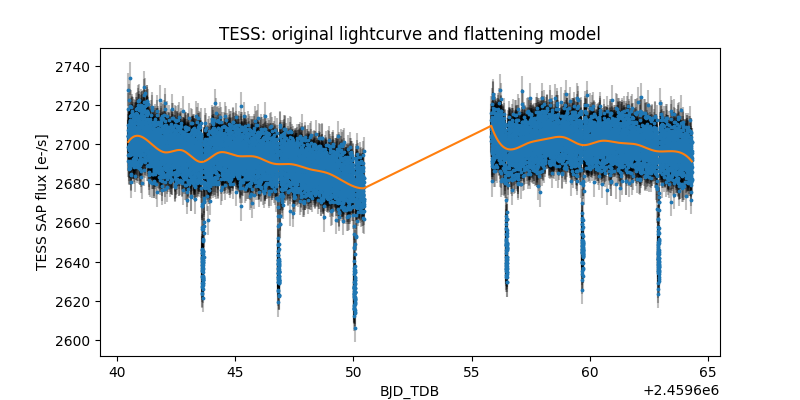

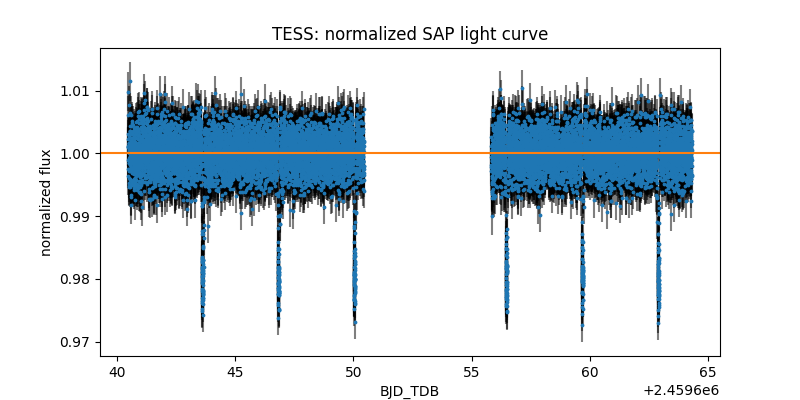

In [8]:
plt.figure(figsize=(8,4))
plt.title('TESS: original lightcurve and flattening model')
plt.scatter(time, sap_flux, c='C0', s=3)
plt.errorbar(time, sap_flux, yerr=sap_flux_error, ecolor='k', fmt=' ', alpha=0.25, zorder=-1)
plt.plot(time, sap_flatten_model, c='C1', zorder=10)
plt.xlabel('BJD_TDB')
plt.ylabel('TESS SAP flux [e-/s]')
plt.show()

plt.figure(figsize=(8,4))
plt.title('TESS: normalized SAP light curve')
plt.scatter(time, sap_flatten_flux, c='C0', s=3)
plt.errorbar(time, sap_flatten_flux, yerr=sap_flux_error/sap_flatten_model, 
             ecolor='k', fmt=' ', alpha=0.5, zorder=-1)
plt.xlabel('BJD_TDB')
plt.ylabel('normalized flux')
plt.axhline(1.000, c='C1')
plt.show()

Да, это формула для вычисления "свернутого" по фазе времени (`phase_folded_time`) относительно транзита.

Формула работает следующим образом:

1. **time - Transit_time**: Вычитает центральное время транзита из текущего времени, чтобы выровнять все транзиты относительно их центрального момента.

2. **- Period/2**: Смещает центральное время транзита на половину периода назад, чтобы обеспечить симметрию относительно точки фолдинга.

3. **% Period**: Использует операцию остатка от деления, чтобы ограничить значения временем одного полного орбитального периода. Это свертывает и выравнивает все временные метки в пределах одного периода.

4. **- Period/2**: Возвращает временные метки обратно в симметричный интервал вокруг центрального времени транзита.

Эта формула позволяет эффективно выровнять и анализировать данные всех транзитов объекта в сопоставимых временных интервалах, независимо от числа полных орбит, которые могли пройти между отдельными транзитами.

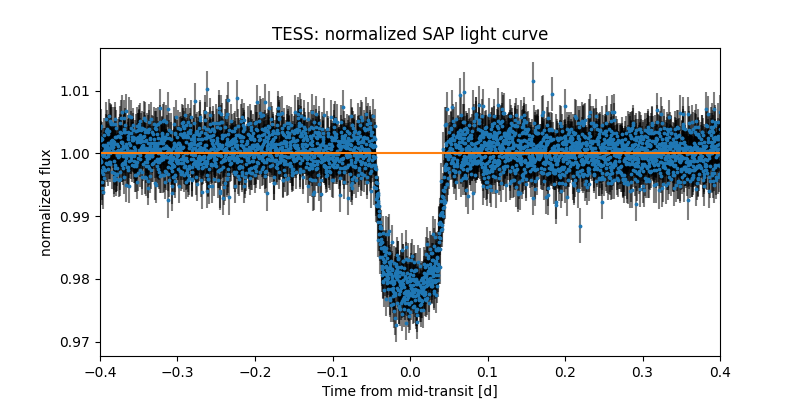

In [9]:
phase_folded_time = (time-Transit_time - Period/2)%Period - Period/2

plt.figure(figsize=(8,4))
plt.title('TESS: normalized SAP light curve')
plt.scatter(phase_folded_time, sap_flatten_flux, c='C0', s=3)
plt.errorbar(phase_folded_time, sap_flatten_flux, yerr=sap_flux_error/sap_flatten_model, 
             ecolor='k', fmt=' ', alpha=0.5, zorder=-1)
plt.xlabel('Time from mid-transit [d]')
plt.ylabel('normalized flux')
plt.xlim(-0.4, 0.4)
plt.axhline(1.000, c='C1')
plt.show()

1. **Проблема с центровкой**: Указывается, что часть кривой блеска сразу перед и после транзита не центрирована вокруг единицы, как это должно быть. Это означает, что ожидаемое "плато" на графике (где яркость остается постоянной) не выровнено правильно.

2. **Причина проблемы**: Это происходит потому, что алгоритм фильтрации все еще учитывает некоторые точки, которые принадлежат самому транзиту, при вычислении модели. Эти точки могут искажать результаты фильтрации, даже при приложении стараний по их исключению.

3. **Предлагаемое решение**: Для устранения этой проблемы предлагается исключить точки, затронутые транзитом, из процесса вычисления модели фильтрации. Это позволит улучшить центровку данных, не включая искаженные значениями во время транзита диапазоны.

4. **Предостережение**: Единственное предостережение — увеличить продолжительность транзитного времени, чтобы убедиться, что все точки транзита действительно исключены из вычислений. Такое расширение окна транзита может привести к исключению некоторых точек вне транзита, но это безопасно и даже желательно, чтобы не включать в него любые потенциальные точки из транзита.

Таким образом, целью является улучшение точности фильтрации, что позволит лучше и корректнее изучать особенности данных.

In [12]:
# Value form ExoFOP: 2.169 hours 
Transit_window = 2.169 * 2 /24. 

from wotan import transit_mask
mask = transit_mask(
    time=time,
    period = Period,
    duration = Transit_window,
    T0=Transit_time 
)

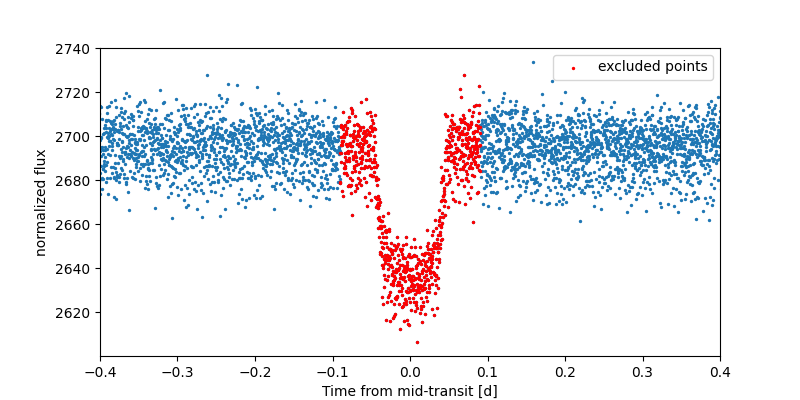

In [13]:
plt.figure(figsize=(8,4))
plt.scatter(phase_folded_time, sap_flux, s=2)
plt.scatter(phase_folded_time[mask], sap_flux[mask], c='r', zorder=1, s=2, label='excluded points')
plt.xlabel('Time from mid-transit [d]')
plt.ylabel('normalized flux')
plt.xlim(-0.4, 0.4)
plt.legend()
plt.show() 

In [14]:
sap_masked_flatten_flux, sap_masked_flatten_model = flatten(
    time,
    sap_flux,
    method='hspline',
    window_length=0.8, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

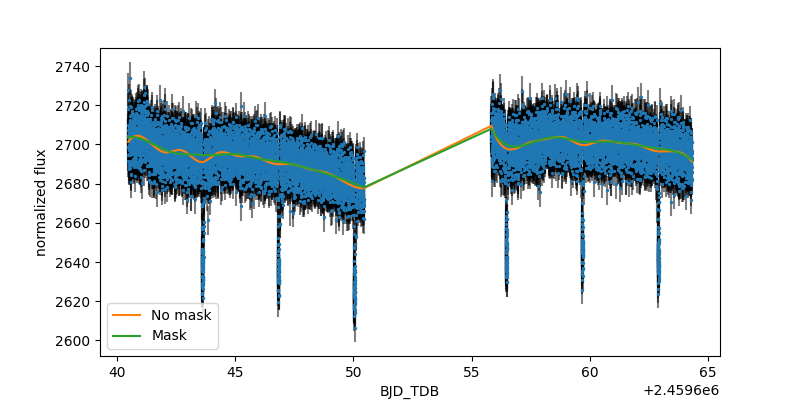

In [15]:
plt.figure(figsize=(8,4))
plt.scatter(time, sap_flux, c='C0', s=2)
plt.errorbar(time, sap_flux, yerr=sap_flux_error, ecolor='k', fmt=' ', alpha=0.5, zorder=-1)
plt.plot(time, sap_flatten_model, c='C1', zorder=10, label='No mask')
plt.plot(time, sap_masked_flatten_model, c='C2', zorder=11, label='Mask')
plt.xlabel('BJD_TDB')
plt.ylabel('normalized flux')
plt.legend()
plt.show()

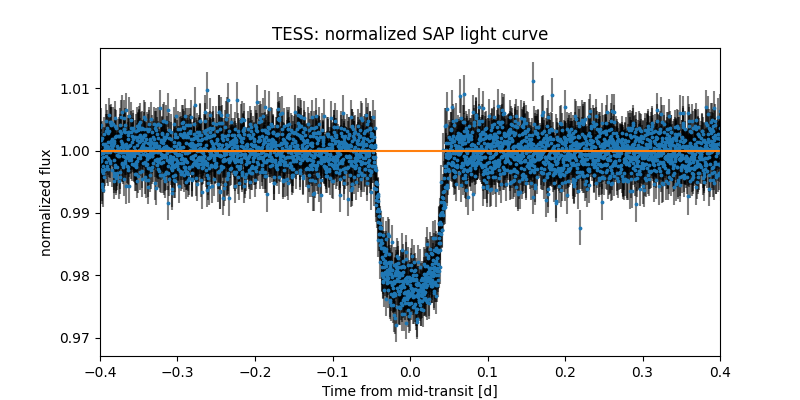

In [16]:
plt.figure(figsize=(8,4))
plt.title('TESS: normalized SAP light curve')
plt.scatter(phase_folded_time, sap_masked_flatten_flux, c='C0', s=3)
plt.errorbar(phase_folded_time, sap_masked_flatten_flux, yerr=sap_flux_error/sap_flatten_model, 
             ecolor='k', fmt=' ', alpha=0.5, zorder=-1)
plt.xlabel('Time from mid-transit [d]')
plt.ylabel('normalized flux')
plt.xlim(-0.4, 0.4)
plt.axhline(1.000, c='C1')
plt.show()

When analyzing the TASTE dataset, we determined the **best parameters for the aperture photometry and the reference stars** by <u>computing the standard deviation</u> of the out-transit part of the normalized light curve. 

We can use the same criterion here to determine if masking has improved our filtering and later to select the best combination of filtering algorithm and window size

In [17]:
print('STD with mask   : {0:.6f}'.format(np.std(sap_masked_flatten_flux[~mask])))
print('STD without mask: {0:.6f}'.format(np.std(sap_flatten_flux[~mask])))

STD with mask   : 0.002673
STD without mask: 0.002679


Результаты показывают, что использование маски незначительно уменьшает стандартное отклонение (с 0.002679 до 0.002673), что указывает на небольшое улучшение в однообразии данных после маскировки. Это может свидетельствовать о том, что маскирование помогло устранить некоторые шумы или выбросы из данных, улучшая их качество для дальнейшего анализа. Разница небольшая, но может быть значимой в зависимости от контекста и целей анализа.

Let's try a different algorithm, and with two different window length each algorithm. 

As a second algorithm, we can test the biweight robust estimator.



In [18]:
sap_masked_biweight_w10_flux, sap_masked_biweight_w10_model = flatten(
    time,
    sap_flux,
    method='biweight',
    window_length=1.0, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

sap_masked_biweight_w15_flux, sap_masked_biweight_w15_model = flatten(
    time,
    sap_flux,
    method='biweight',
    window_length=1.5, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

sap_masked_hspline_w10_flux, sap_masked_hspline_w10_model = flatten(
    time,
    sap_flux,
    method='hspline',
    window_length=1.0, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

sap_masked_hspline_w15_flux, sap_masked_hspline_w15_model = flatten(
    time,
    sap_flux,
    method='hspline',
    window_length=1.5, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)


In [19]:
print('STD SAP biweight, window=1.0: {0:.6f}'.format(np.std(sap_masked_biweight_w10_flux[~mask])))
print('STD SAP biweight, window=1.5: {0:.6f}'.format(np.std(sap_masked_biweight_w15_flux[~mask])))
print('STD SAP hspline, window=1.0 : {0:.6f}'.format(np.std(sap_masked_hspline_w10_flux[~mask])))
print('STD SAP hspline, window=1.5 : {0:.6f}'.format(np.std(sap_masked_hspline_w15_flux[~mask])))

STD SAP biweight, window=1.0: 0.002672
STD SAP biweight, window=1.5: 0.002682
STD SAP hspline, window=1.0 : 0.002675
STD SAP hspline, window=1.5 : 0.002692


In [20]:
pdcsap_masked_biweight_w10_flux, pdcsap_masked_biweight_w10_model = flatten(
    time,
    pdcsap_flux,
    method='biweight',
    window_length=1.0, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

In [21]:
pdcsap_masked_biweight_w15_flux, pdcsap_masked_biweight_w15_model = flatten(
    time,
    pdcsap_flux,
    method='biweight',
    window_length=1.5, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

In [22]:
pdcsap_masked_hspline_w08_flux, pdcsap_masked_hspline_w08_model = flatten(
    time,
    pdcsap_flux,
    method='hspline',
    window_length=0.8, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

In [23]:
pdcsap_masked_hspline_w10_flux, pdcsap_masked_hspline_w10_model = flatten(
    time,
    pdcsap_flux,
    method='hspline',
    window_length=1.0, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

In [24]:
pdcsap_masked_hspline_w15_flux, pdcsap_masked_hspline_w15_model = flatten(
    time,
    pdcsap_flux,
    method='hspline',
    window_length=1.5, 
    break_tolerance=0.5, 
    return_trend = True,
    mask = mask,
)

In [25]:
print('STD PDCSAP biweight, window=1.0: {0:.6f}'.format(np.std(pdcsap_masked_biweight_w10_flux[~mask])))
print('STD PDCSAP biweight, window=1.5: {0:.6f}'.format(np.std(pdcsap_masked_biweight_w15_flux[~mask])))
print('-------')
print('STD PDCSAP hspline, window=0.8 : {0:.6f}'.format(np.std(pdcsap_masked_hspline_w08_flux[~mask])))
print('STD PDCSAP hspline, window=1.0 : {0:.6f}'.format(np.std(pdcsap_masked_hspline_w10_flux[~mask])))
print('STD PDCSAP hspline, window=1.5 : {0:.6f}'.format(np.std(pdcsap_masked_hspline_w15_flux[~mask])))

STD PDCSAP biweight, window=1.0: 0.002672
STD PDCSAP biweight, window=1.5: 0.002682
-------
STD PDCSAP hspline, window=0.8 : 0.002673
STD PDCSAP hspline, window=1.0 : 0.002675
STD PDCSAP hspline, window=1.5 : 0.002692


The standard deviations are similar in all cases, with *the Huber spline* performing <u>slightly better than biweight</u>. 

It may happen that the **average associated error** of the observations may be <u>higher</u> than the standard deviation of the filtered light curve, meaning that either we are 
1. overcorrecting the light curve, 
2. or the errors associated by TESS team are overestimated. 

If the standard deviation is still smaller than the median error for increasing window length (increasing the window length reduces the chance of overfitting), then most likely we are in the second situation.

1. **Сравнение методов**: Оба метода фильтрации дают схожие стандартные отклонения, но сплайн Хьюбера работает немного лучше, чем биусредний.

2. **Средняя ошибка и стандартное отклонение**: Если средняя связанная ошибка наблюдений выше, чем стандартное отклонение отфильтрованной кривой блеска, это может указывать на две возможные ситуации:
   - **Перекоррекция (overcorrecting)**: Это означает, что процесс фильтрации мог быть слишком агрессивным, удаляя больше сигнала, чем следовало.
   - **Переоценка ошибок TESS**: Это может также означать, что ошибки, прикреплённые к данным командой TESS, могут быть завышены.

3. **Выводы по стандартному отклонению и медианной ошибке**: Если при увеличении длины окна стандартное отклонение все еще меньше медианной ошибки, это подчеркивает вторую ситуацию, где ошибки могут быть переоценены.

Увеличение длины окна помогает уменьшить риск переобучения, то есть чрезмерной адаптации модели к шуму данных. Из этих наблюдений можно сделать выводы о необходимости корректировки методов обработки данных для улучшения их качества.

In [138]:
print('average normalized error: {0:.6f}'.format(np.average(pdcsap_flux_error[~mask]/pdcsap_masked_biweight_w10_model[~mask])))


average normalized error: 0.002772


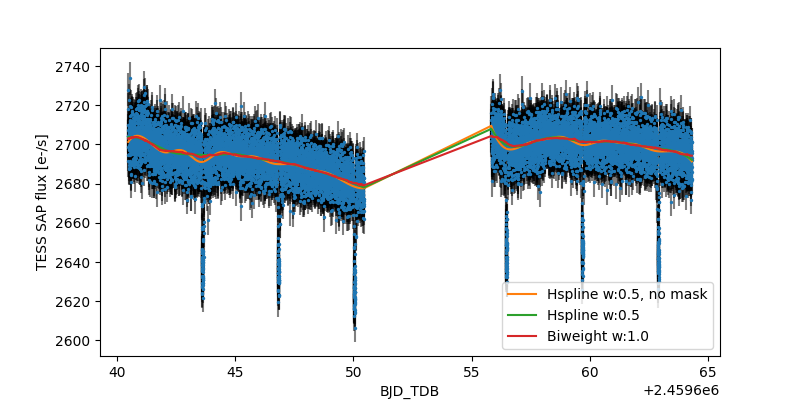

In [139]:
plt.figure(figsize=(8,4))
plt.scatter(time, sap_flux, c='C0', s=2)
plt.errorbar(time, sap_flux, yerr=sap_flux_error, ecolor='k', fmt=' ', alpha=0.5, zorder=-1)
plt.plot(time, sap_flatten_model, c='C1', zorder=10, label='Hspline w:0.5, no mask')
plt.plot(time, sap_masked_flatten_model, c='C2', zorder=11, label='Hspline w:0.5')
plt.plot(time, sap_masked_biweight_w10_model, c='C3', zorder=11, label='Biweight w:1.0')
plt.xlabel('BJD_TDB')
plt.ylabel('TESS SAP flux [e-/s]')
plt.legend()
plt.show()

In [140]:
import pickle 

sector50_dictionary = {
    'time': time,
    'selected_flux': pdcsap_masked_hspline_w10_flux,
    'selected_flux_error': pdcsap_flux_error/pdcsap_masked_hspline_w10_model,

    'sap_masked_hspline_w10_flux': sap_masked_hspline_w10_flux,
    'sap_masked_hspline_w10_flux_error': sap_flux_error/sap_masked_hspline_w10_model,

    'sap_masked_hspline_w15_flux': sap_masked_hspline_w15_flux,
    'sap_masked_hspline_w15_flux_error': sap_flux_error/sap_masked_hspline_w15_model,

    'pdcsap_masked_hspline_w10_flux': pdcsap_masked_hspline_w10_flux,
    'pdcsap_masked_hspline_w10_flux_error': pdcsap_flux_error/pdcsap_masked_hspline_w10_model,
    
    'pdcsap_masked_hspline_w15_flux': pdcsap_masked_hspline_w15_flux,
    'pdcsap_masked_hspline_w15_flux_error': pdcsap_flux_error/pdcsap_masked_hspline_w15_model,
}

pickle.dump(sector50_dictionary, 
            open('HATP12_TESS_sector50_filtered.p','wb'))

In [ ]:
print('STD with mask   : {0:.6f}'.format(np.std(sap_masked_flatten_flux[~mask])))
print('STD without mask: {0:.6f}'.format(np.std(sap_flatten_flux[~mask])))

STD with mask   : 0.002673
STD without mask: 0.002679
